> # Import all necessary libraries and packages

In [98]:
!pip install openpyxl
#import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

  Created wheel for openpyxl: filename=openpyxl-2.6.4-py2.py3-none-any.whl size=245696 sha256=c928d14957d274c836087b42229e472e8b635a000db8223a31d1b5b28172f371
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\cc\a1\3fac901c11890ff7bcb68c2dc53824af4b5528d8bbf0fea264
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8926 sha256=d2b01e5bc0cc7c7f029509726216c47f53d4830822a9addf7e4bdc2e276f1524
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\bd\08\20\b32a8d2578f2de0b7f64f03e5880238fc3451605bc5bd04525
Successfully built openpyxl et-xmlfile


In [2]:
sns.set(style="whitegrid")
#sns.set(style="ticks", palette="pastel")
sns.set_context('notebook')

In [3]:
import re
from scipy import stats
import numpy as np

> ### Read file from data folder

In [4]:
data = pd.read_excel('data/Week2_challenge_data_source.xlsx')

In [101]:
"""
 converted this column to numeric as it there exist empty strings 
 in the column.

"""

bearer = pd.to_numeric(data['Bearer Id'], errors = 'coerce')

In [102]:
"""
    check basic attributes of features int the data using 
    the check_properties function
    
"""

def check_properties(df,name):
    unique = df[name].nunique()
    print('there are ***', unique, '***unique values in ', name)
    null = df[name].isnull().sum()
    print(name, 'has ***' , null , '*** null values')
    dtype = df[name].dtype
    print('the data type of' , name , 'is' , '***' , dtype, '***')
    

In [7]:
check_properties(data,'Dur. (ms)')

there are *** 89525 ***unique values in  Dur. (ms)
Dur. (ms) has *** 1 *** null values
the data type of Dur. (ms) is *** float64 ***


In [104]:
"""
remove rows with empty strings that have been converted to nan

"""

data.drop(data.loc[bearer.isna()].index, inplace = True)

In [9]:
data.drop(data.loc[data['IMSI'].isna()].index, inplace = True)

> ### TASK 1.1

#### number of sessions per user

In [10]:
number_of_sessions = data.groupby('IMSI')['Bearer Id'].count()

#### session duration

In [11]:
sessions_duration = data.groupby('IMSI')['Dur. (ms)'].sum()

#### the Total download (DL) and Upload (UL) data

In [12]:
total_download = data.groupby('IMSI')['Total UL (Bytes)','Total DL (Bytes)'].sum()

In [13]:
#total_download.get_group(208201448079117.0)

#### Total Data Volume for each Application

In [14]:
data['Social_media Data Volume'] = data['Social Media DL (Bytes)'].add(data['Social Media UL (Bytes)'])

In [15]:
data['Google Data Volume'] = data['Google DL (Bytes)'].add(data['Google UL (Bytes)'])
data['Email Data Volume'] = data['Email DL (Bytes)'].add(data['Email UL (Bytes)'])
data['Youtube Data Volume'] = data['Youtube DL (Bytes)'].add(data['Youtube UL (Bytes)'])
data['Netflix Data Volume'] = data['Netflix DL (Bytes)'].add(data['Netflix UL (Bytes)'])
data['Gaming Data Volume'] = data['Gaming DL (Bytes)'].add(data['Gaming UL (Bytes)'])
data['Other Data Volume'] = data['Other DL (Bytes)'].add(data['Other UL (Bytes)'])

In [16]:
total_download_app = data.groupby('IMSI')['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'].sum()

In [17]:
type(total_download_app)

pandas.core.frame.DataFrame

#### Interim Solution

In [18]:
data2 = data[['Bearer Id','Dur. (ms).1','Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume']]

In [46]:
data2['Total Data Volume'] = data['Total DL (Bytes)'].add(data['Total UL (Bytes)'])

In [19]:
data2['Bearer Id'] = pd.to_numeric(data2['Bearer Id'], errors = 'coerce')

c:\users\user\anaconda3\envs\10academy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Remove Outliers

In [20]:
"""
Using the zscore and a threshold of 3 remove outliers from the da 
"""

z = np.abs(stats.zscore(data2))
data2 = data2[(z < 3).all(axis=1)]

In [21]:
data2.shape

(146757, 11)

#### Non Graphical Univariate Analysis

In [22]:
data2.describe()

,Bearer Id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume
count,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05,1.467570e+05
mean,1.013502e+19,9.898566e+07,4.111984e+07,4.546449e+08,1.828626e+06,7.808547e+06,4.294454e+08,2.258953e+06,2.263871e+07,2.262766e+07,4.303389e+08
std,2.893288e+18,6.048941e+07,1.125690e+07,2.442044e+08,1.035373e+06,3.516725e+06,2.432479e+08,1.071030e+06,9.245206e+06,9.255709e+06,2.440825e+08
min,6.917538e+18,7.142988e+06,7.324119e+06,7.114041e+06,1.563000e+03,4.033000e+04,1.490450e+05,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,7.349883e+18,5.734535e+07,3.322015e+07,2.430940e+08,9.326850e+05,4.944623e+06,2.186705e+08,1.359114e+06,1.599261e+07,1.598149e+07,2.186913e+08
50%,7.349883e+18,8.639998e+07,4.114090e+07,4.557960e+08,1.827475e+06,7.815956e+06,4.300010e+08,2.263581e+06,2.265655e+07,2.263652e+07,4.315131e+08
75%,1.304243e+19,1.294122e+08,4.902650e+07,6.657569e+08,2.728064e+06,1.068312e+07,6.399883e+08,3.159258e+06,2.928899e+07,2.928346e+07,6.414966e+08
max,1.318654e+19,3.481521e+08,7.483343e+07,9.029696e+08,3.650861e+06,1.552878e+07,8.595209e+08,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08


In [93]:
descriptive_analysis = data2.describe()

In [100]:
descriptive_analysis.to_excel('data/Descriptive Table.xlsx')

#### Box Plot on all Variable of Interest

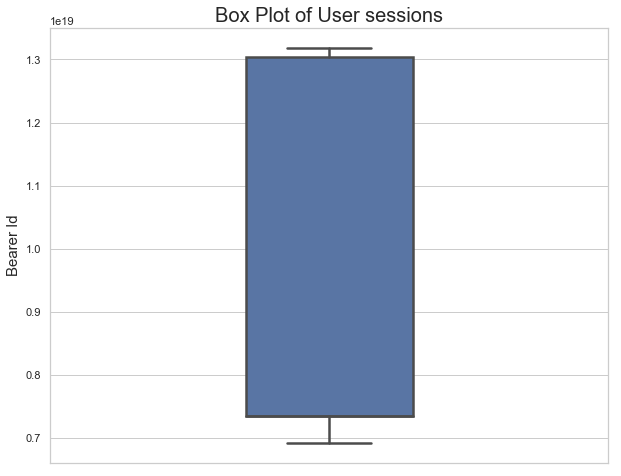

In [82]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Bearer Id', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of User sessions', fontsize = 20)
ax.set_ylabel('Bearer Id',fontsize = 15)
plt.savefig('fig/user_session.png')
#ax = sns.swarmplot(x="Bearer Id", data=data2, color=".25")

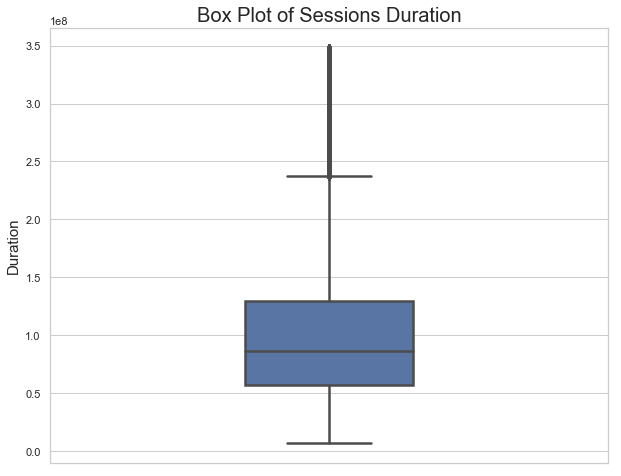

In [83]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Dur. (ms).1', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Sessions Duration', fontsize = 20)
ax.set_ylabel('Duration',fontsize = 15)
plt.savefig('fig/session_duration.png')

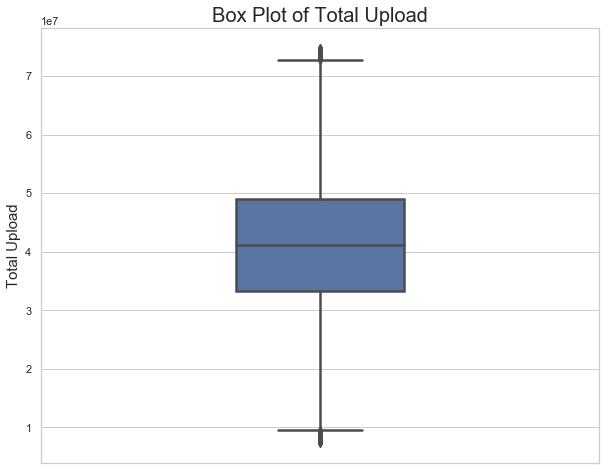

In [84]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Total UL (Bytes)', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Total Upload', fontsize = 20)
ax.set_ylabel('Total Upload',fontsize = 15)
plt.savefig('fig/total_upload.png')

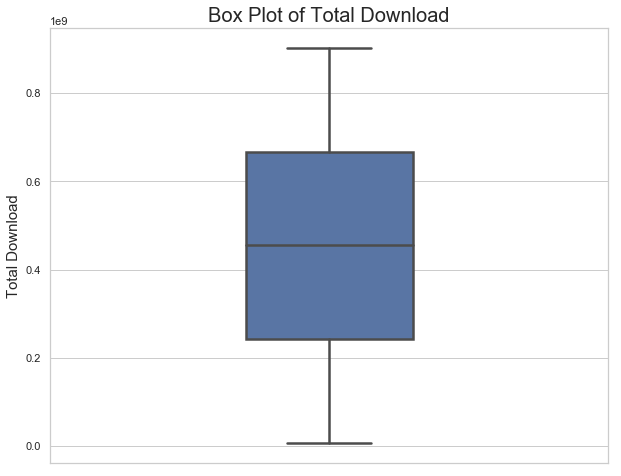

In [85]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Total DL (Bytes)', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Total Download', fontsize = 20)
ax.set_ylabel('Total Download',fontsize = 15)
plt.savefig('fig/total_download.png')

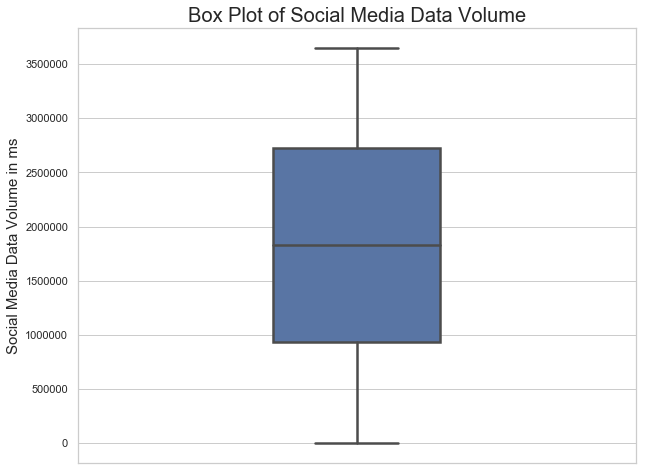

In [86]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Social_media Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Social Media Data Volume', fontsize = 20)
ax.set_ylabel('Social Media Data Volume in ms',fontsize = 15)
plt.savefig('fig/social_media.png')

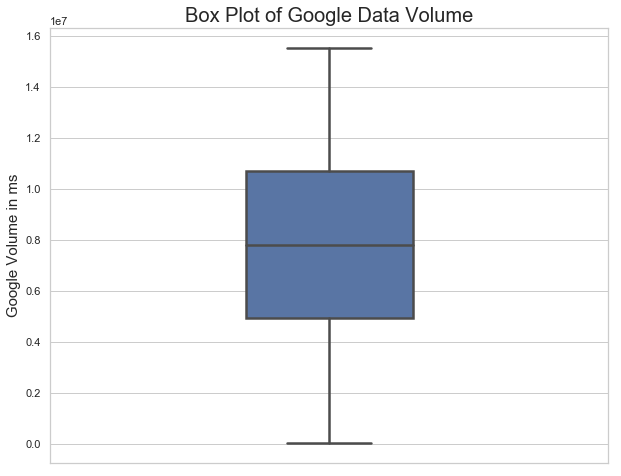

In [87]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Google Data Volume', fontsize = 20)
ax.set_ylabel('Google Volume in ms',fontsize = 15)
plt.savefig('fig/Google.png')

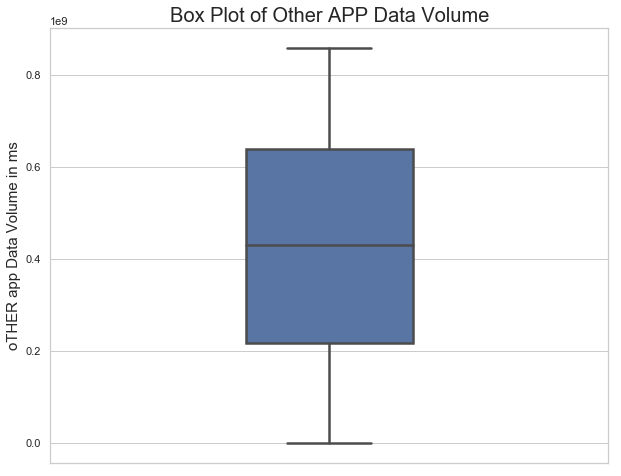

In [88]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Other Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Other APP Data Volume', fontsize = 20)
ax.set_ylabel('oTHER app Data Volume in ms',fontsize = 15)
plt.savefig('fig/other_app.png')

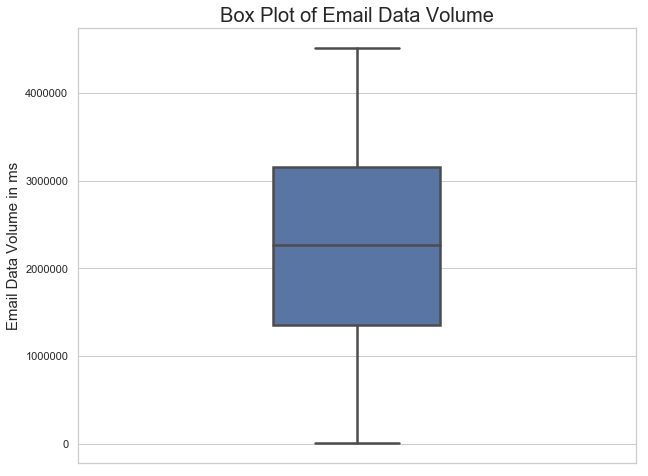

In [89]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Email Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Email Data Volume', fontsize = 20)
ax.set_ylabel('Email Data Volume in ms',fontsize = 15)
plt.savefig('fig/Email.png')

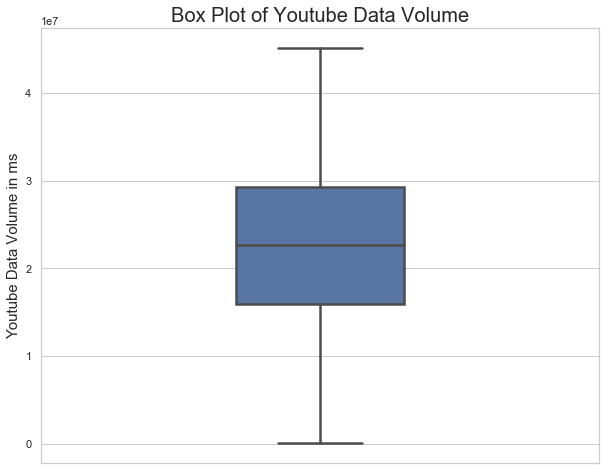

In [90]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Youtube Data Volume', fontsize = 20)
ax.set_ylabel('Youtube Data Volume in ms',fontsize = 15)
plt.savefig('fig/youtube.png')

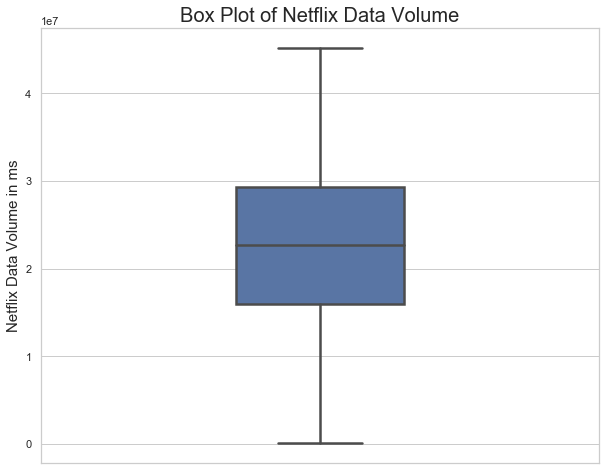

In [91]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Netflix Data Volume', fontsize = 20)
ax.set_ylabel('Netflix Data Volume in ms',fontsize = 15)
plt.savefig('fig/Netflix.png')

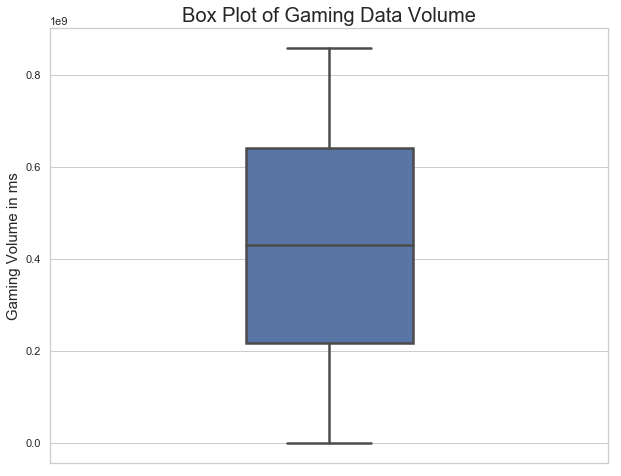

In [92]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Gaming Data Volume', fontsize = 20)
ax.set_ylabel('Gaming Volume in ms',fontsize = 15)
plt.savefig('fig/Gaming.png')

####  Bivariate Analysis on All applicatiions and Total Data using scatter Plot 

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Social_media Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)

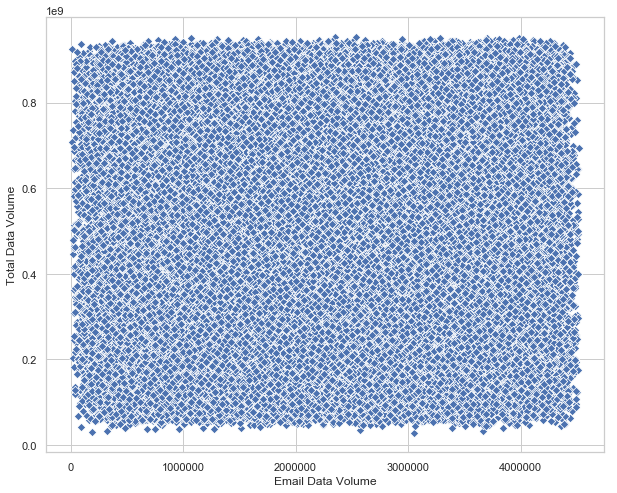

In [50]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(data = data2 ,x = 'Email Data Volume',y='Total Data Volume', marker='D')